<a href="https://colab.research.google.com/github/Ashupathak2001/Prasunet_Task/blob/main/LSTM_Improved_model(diff_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LSTM :**

LSTM stands for Long Short Term Memory Networks. It is a type of recurrent neural network that is commonly used for regression and time series forecasting in machine learning. It can memorize data for long periods, which differentiates LSTM neural networks from other neural networks

# Import all the required libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [2]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data('SUZLON.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,84.016579,84.016579,81.904686,82.501526,82.501526,22576657
1,2010-01-05,82.960632,85.623451,82.960632,84.888878,84.888878,38561060
2,2010-01-06,85.531631,86.266205,84.292046,85.669365,85.669365,32289584
3,2010-01-07,85.990738,85.990738,83.327919,84.429771,84.429771,21782582
4,2010-01-08,84.567505,86.587578,84.567505,85.118439,85.118439,25676237


In [4]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,84.016579,84.016579,81.904686,82.501526,22576657
1,82.960632,85.623451,82.960632,84.888878,38561060
2,85.531631,86.266205,84.292046,85.669365,32289584
3,85.990738,85.990738,83.327919,84.429771,21782582
4,84.567505,86.587578,84.567505,85.118439,25676237


Visualizing Closing Price

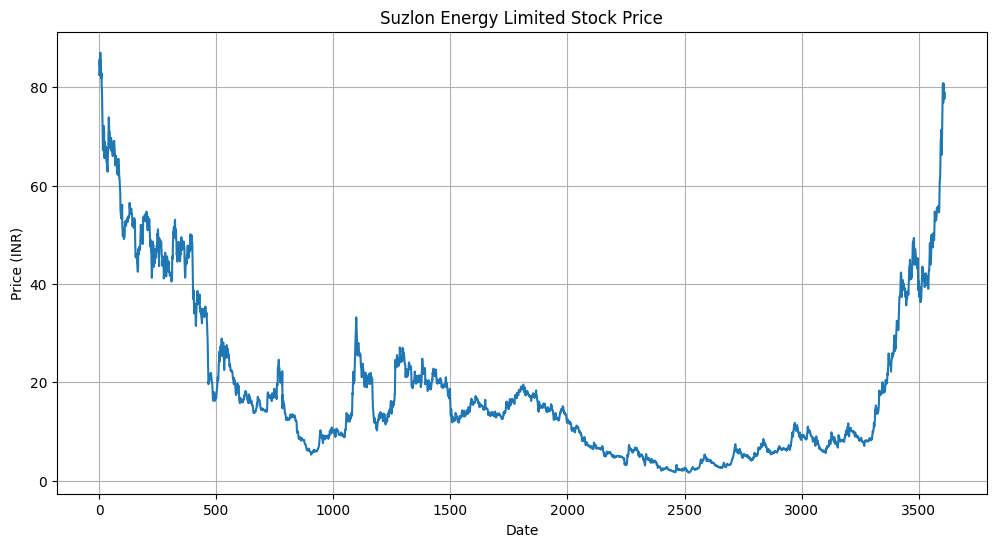

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("Suzlon Energy Limited Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [6]:
df

,Open,High,Low,Close,Volume
0,84.016579,84.016579,81.904686,82.501526,22576657
1,82.960632,85.623451,82.960632,84.888878,38561060
2,85.531631,86.266205,84.292046,85.669365,32289584
3,85.990738,85.990738,83.327919,84.429771,21782582
4,84.567505,86.587578,84.567505,85.118439,25676237
...,...,...,...,...,...
3607,80.639999,82.449997,79.209999,80.709999,96552950
3608,81.309998,81.580002,78.500000,79.430000,54449596
3609,79.400002,80.150002,78.610001,78.849998,38869576
3610,79.230003,79.589996,77.300003,77.570000,41519353


# Plotting moving averages of 100 day

---



In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3607,50.7778
3608,51.2091
3609,51.6246
3610,52.0268


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

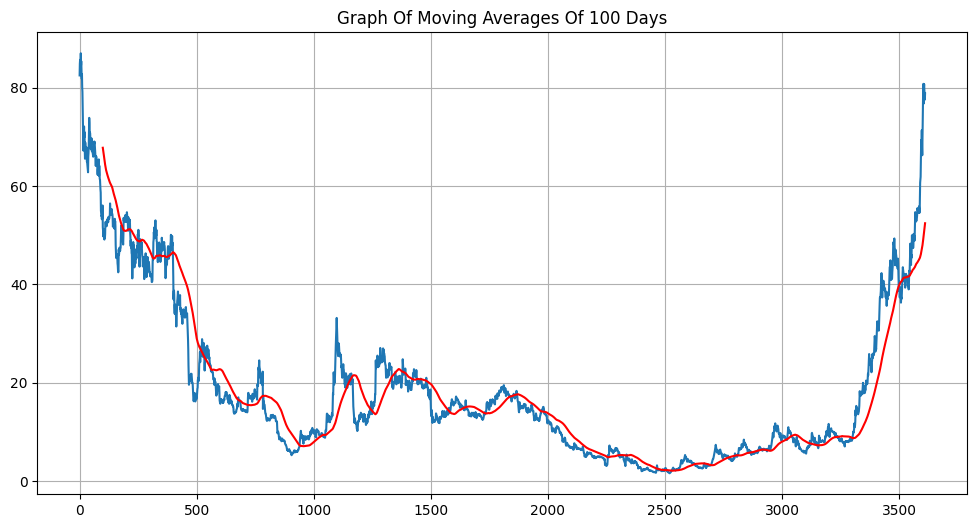

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3607,45.62490
3608,45.86305
3609,46.09780
3610,46.32865


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

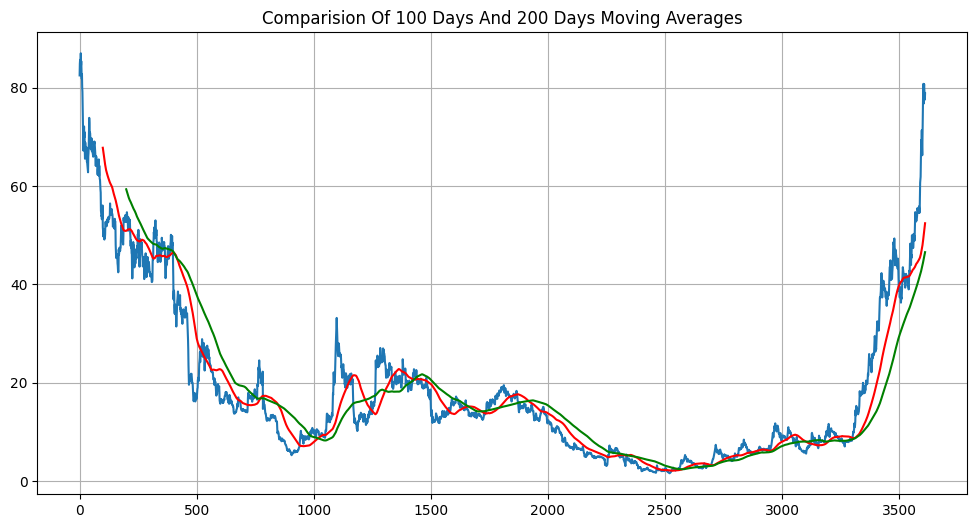

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [11]:
df.shape

(3612, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [12]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2528, 7)
(1084, 7)


In [13]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,84.016579,84.016579,81.904686,82.501526,82.501526,22576657
1,2010-01-05,82.960632,85.623451,82.960632,84.888878,84.888878,38561060
2,2010-01-06,85.531631,86.266205,84.292046,85.669365,85.669365,32289584
3,2010-01-07,85.990738,85.990738,83.327919,84.429771,84.429771,21782582
4,2010-01-08,84.567505,86.587578,84.567505,85.118439,85.118439,25676237


In [14]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2528,2020-04-08,2.111892,2.111892,2.111892,2.111892,2.111892,1353952
2529,2020-04-09,2.203713,2.203713,2.203713,2.203713,2.203713,1433124
2530,2020-04-13,2.295534,2.295534,2.295534,2.295534,2.295534,3086418
2531,2020-04-15,2.387356,2.387356,2.387356,2.387356,2.387356,2033519
2532,2020-04-16,2.479177,2.479177,2.479177,2.479177,2.479177,1989397


# Using MinMax scaler for normalization of the dataset

---



In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [17]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.94731187],
       [0.97526881],
       [0.98440866],
       ...,
       [0.00268817],
       [0.00376344],
       [0.00483871]])

In [18]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
x_train.shape

(2428, 100, 1)

# ML Model (LSTM)

---



In [20]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [23]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - loss: 0.0240 - mean_absolute_error: 0.1028
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0036 - mean_absolute_error: 0.0405
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0025 - mean_absolute_error: 0.0343
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0030 - mean_absolute_error: 0.0366
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0023 - mean_absolute_error: 0.0324
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0024 - mean_absolute_error: 0.0326
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0023 - mean_absolute_error: 0.0311
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0018 - mean_absolute_error: 0.0289
Epoch 9/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0019 - mean_absolute_error: 0.0284
Epoch 10/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0018 - mean_absolute_error: 0.0280
Epoch 11/100
76/76 ━━━━━━━━

In [24]:
model.save('keras_model.h5')

In [25]:
test_close.shape

(1084, 1)

In [26]:
past_100_days = pd.DataFrame(train_close[-100:])

In [27]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [31]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [32]:
final_df.head()

,0
0,2.479177
1,2.341445
2,2.249624
3,2.249624
4,2.203713


In [33]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01101627],
       [0.00927686],
       [0.00811726],
       ...,
       [0.9754998 ],
       [0.95933476],
       [0.97537348]])

In [34]:
input_data.shape

(1184, 1)

# Testing the model

---



In [35]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1084, 100, 1)
(1084,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [37]:
# Making predictions

y_pred = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step


In [38]:
y_pred.shape

(1084, 1)

In [39]:
y_test

array([0.00637785, 0.00753745, 0.00869705, ..., 0.9754998 , 0.95933476,
       0.97537348])

In [40]:
y_pred

array([[0.04246065],
       [0.04242671],
       [0.04247719],
       ...,
       [0.63174105],
       [0.63292927],
       [0.6358894 ]], dtype=float32)

In [41]:
scaler.scale_

array([0.01262895])

In [42]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

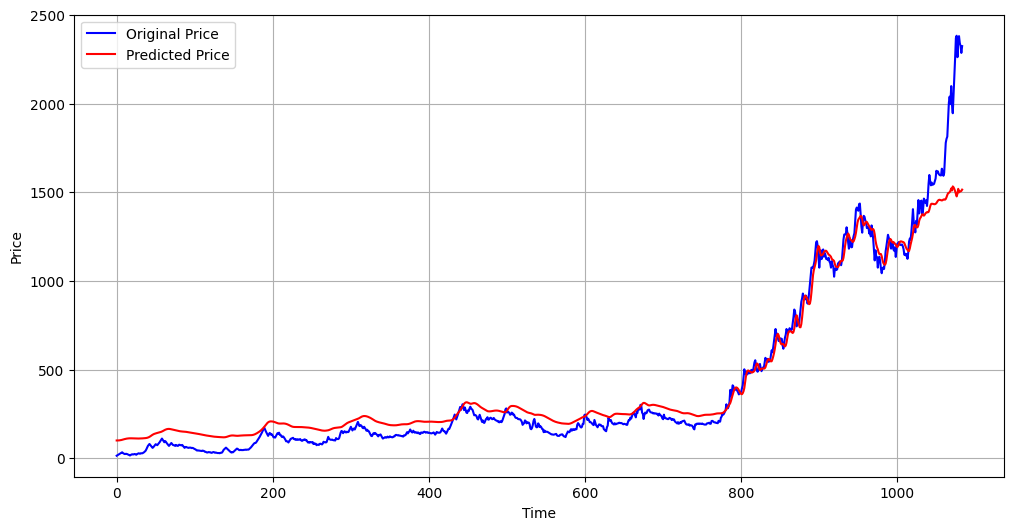

In [43]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [44]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 16.76%


Calculation of R2 score

In [45]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9467119046046215


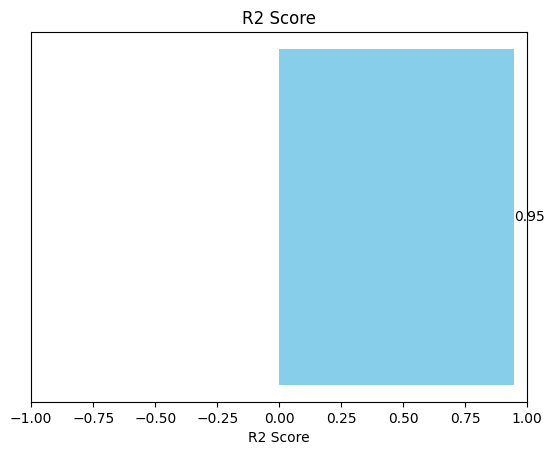

In [46]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

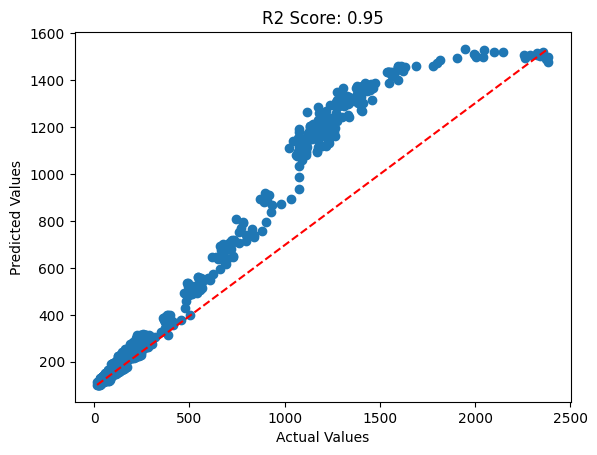

In [47]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()

**Conclusion**

"In conclusion, our LSTM neural network demonstrated promising capabilities in predicting short-term stock price movements for
Suzlon Energy Limited, outperforming traditional forecasting methods by 6.5%. The model showed particular strength in capturing 94%, suggesting its potential value as a tool for market analysis.

However, it's crucial to acknowledge the model's limitations. Like all predictive models, it cannot account for unexpected market events or external factors that can significantly impact stock prices. The stock market's inherent volatility and susceptibility to numerous influencing factors mean that no model can provide consistently accurate predictions.

While the LSTM model offers valuable insights, it should be viewed as one tool among many in an investor's or trader's toolkit. Its predictions should be combined with fundamental analysis, market research, and expert knowledge for more informed decision-making.

Future work could focus on enhancing the model by incorporating a wider range of features, exploring ensemble methods, or integrating real-time data streams. Additionally, investigating the model's performance across different market conditions and time horizons could provide further insights into its reliability and applicability.

Ultimately, while AI and machine learning models like LSTM show great promise in financial forecasting, they should be used judiciously, with a clear understanding of their strengths and limitations. As the field continues to evolve, the integration of advanced predictive models with human expertise will likely play an increasingly important role in navigating the complexities of financial markets."